# Problem Statement

**Predicting the age of abalone from physical measurements**

**Author** : [Ayoub Berdeddouch](https://github.com/ayoub-berdeddouch)

![Abalone Shell](https://i.pinimg.com/736x/88/fd/0e/88fd0ea8830ef739e830439f8eff13c6--abalone-shell-sea-shells.jpg)

**Problem Description** Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a laborious task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. However, for this problem we shall assume that the abalone's physical measurements are sufficient to provide an accurate age prediction.

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score



# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

import warnings; 
warnings.simplefilter('ignore')

%matplotlib inline

**Attribute Information:**

Given is the attribute name, attribute type, the measurement unit and a brief description. 

The number of rings is the value to predict: either as a continuous value or as a classification problem.

| Name | Data Type | Measurement Unit | Description|
|:---|:---|:---|:---|
| `Sex` | nominal | -- | M, F, and I (infant)|
| `Length` | continuous | mm | Longest shell measurement|
| `Diameter` | continuous | mm | perpendicular to length|
| `Height` | continuous | mm | with meat in shell|
| `Whole weight` | continuous | grams | whole abalone|
| `Shucked weight` | continuous | grams | weight of meat|
| `Viscera weight` | continuous | grams | gut weight (after bleeding)|
| `Shell weight` | continuous | grams | after being dried|
| `Rings` | integer | -- | +1.5 gives the age in years|


# Loading Dataset Forest Fires

**Data Preprocessing** 

After importing the libraries which are essential in any analysis. Futher, check the data and process it. 

The **abalone's** age is equal to the number of rings `+ 1.5`, another issue in the dataset is the presence of zeros, and possible multicollinearity.

In [2]:
df = pd.read_csv("abalone.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Dataset analysis** Check the data for any possible problems which may affect the effectiveness of the model.

From problem statement and feature discription, let's first compute the target varible of the problem `Age` and assign it to the dataset. 

`Age = 1.5 + Rings` in years

In [3]:
df['age'] = df['Rings'] + 1.5
df.drop('Rings', axis = 1, inplace = True)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
df.shape

(4177, 9)

In [6]:
print("Data Types:")
df.dtypes

Data Types:


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

**Rename the variables into convetional form**

In [7]:
df.rename(columns = {"Sex":"sex", "Length":"length", "Diameter":"diameter","Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight"}, inplace = True)

**Dataset discription** 

This will be useful to identify problems within the dataset, however only represents the numerical data. Possible problems arise where physical measurements equal zero or negative values. 

Where these values exist they will be removed from the data set, as the dataset is rather large it should not effect the sample. However, another possible solution would be to add the averages of these variables inplace of the zeros, but this is usually reserved for small datasets.

In [8]:
def nan_check(data):
    """
    Function to check the total & % of NA in the dataframe
    input : 
        - data : dataframe
    output: 
        - dataframe containing the Total, % of NAs
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data

nan_check(df)

,Total,%
age,0,0.0
shell_weight,0,0.0
viscera_weight,0,0.0
shucked_weight,0,0.0
whole_weight,0,0.0
height,0,0.0
diameter,0,0.0
length,0,0.0
sex,0,0.0


No missing values as said before

In [9]:
df.describe().T.style.bar(subset=['mean'], color='#FF595E')\
                           .background_gradient(subset=['50%'], cmap='PiYG') # highlight median

,count,mean,std,min,25%,50%,75%,max
length,4177.000000,0.523992,0.120093,0.075000,0.450000,0.545000,0.615000,0.815000
diameter,4177.000000,0.407881,0.099240,0.055000,0.350000,0.425000,0.480000,0.650000
height,4177.000000,0.139516,0.041827,0.000000,0.115000,0.140000,0.165000,1.130000
whole_weight,4177.000000,0.828742,0.490389,0.002000,0.441500,0.799500,1.153000,2.825500
shucked_weight,4177.000000,0.359367,0.221963,0.001000,0.186000,0.336000,0.502000,1.488000
viscera_weight,4177.000000,0.180594,0.109614,0.000500,0.093500,0.171000,0.253000,0.760000
shell_weight,4177.000000,0.238831,0.139203,0.001500,0.130000,0.234000,0.329000,1.005000
age,4177.000000,11.433684,3.224169,2.500000,9.500000,10.500000,12.500000,30.500000


**Key insights :**

        - No missing values in the dataset
        - All numerical features but `sex`
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except `Height` (requires re-check or to be dropped)
        - Each feature has difference scale range

In [10]:
# Notice the minimum value for height is zero. These rows will be excluded.

df[df['height'] == 0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [11]:
# Remove rows 1257 and 3996
df.drop(index=[1257,3996], inplace = True)

In [12]:
# Check if rows have been removed (i.e. array shape = 4175, 9)
df.shape

(4175, 9)

In [13]:
# Printing 5 values of each Feature
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

sex
['M' 'F' 'I']
3

length
[0.455 0.35  0.53  0.44  0.33 ]
134

diameter
[0.365 0.265 0.42  0.255 0.3  ]
111

height
[0.095 0.09  0.135 0.125 0.08 ]
50

whole_weight
[0.514  0.2255 0.677  0.516  0.205 ]
2427

shucked_weight
[0.2245 0.0995 0.2565 0.2155 0.0895]
1515

viscera_weight
[0.101  0.0485 0.1415 0.114  0.0395]
880

shell_weight
[0.15  0.07  0.21  0.155 0.055]
925

age
[16.5  8.5 10.5 11.5  9.5]
28



In [14]:
# Printing the value_counts of each feature.
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].value_counts())
    print()

sex
['M' 'F' 'I']
M    1528
I    1340
F    1307
Name: sex, dtype: int64

length
[0.455 0.35  0.53  0.44  0.33 ]
0.625    94
0.550    94
0.575    93
0.580    92
0.620    87
         ..
0.800     1
0.110     1
0.150     1
0.075     1
0.815     1
Name: length, Length: 134, dtype: int64

diameter
[0.365 0.265 0.42  0.255 0.3  ]
0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.615      1
0.620      1
0.625      1
0.090      1
0.095      1
Name: diameter, Length: 111, dtype: int64

height
[0.095 0.09  0.135 0.125 0.08 ]
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220  

In [15]:
#let's name the categorical and numeical attributes 
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['sex']
numerical_attributes: ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'age']


# Explortory Data Analysis

## Univariate analysis

Understanding feature wise statistics using various inbuilt tools

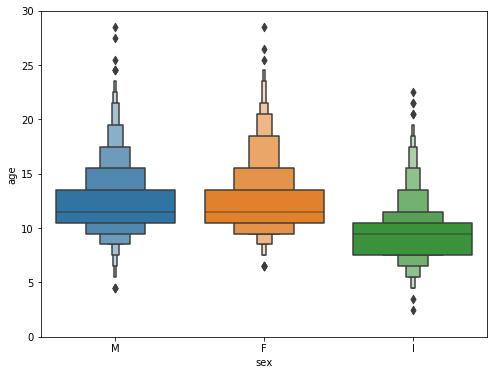

In [16]:
#categorical features
temp = pd.concat([df['age'], df['sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="age", data=df)
fig.axis(ymin=0, ymax=30);

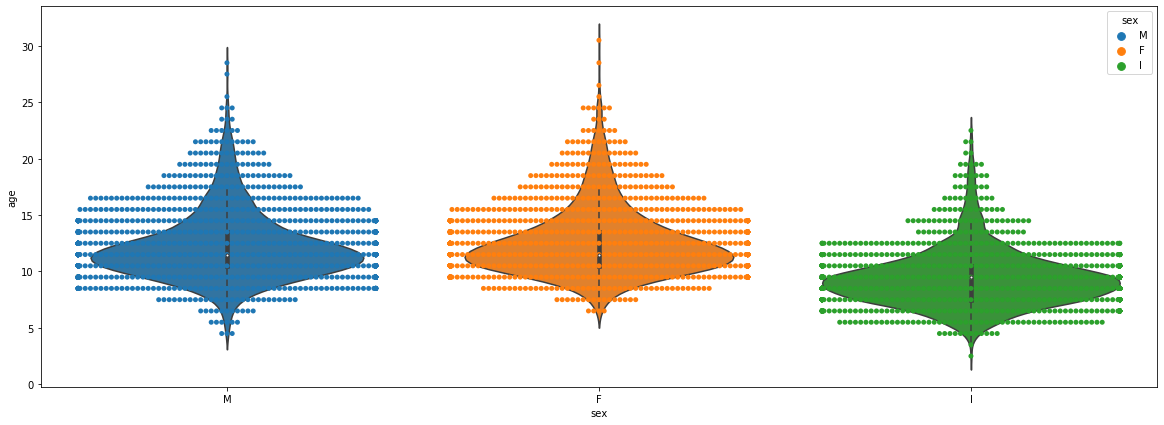

In [17]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex')
sns.violinplot(x = 'sex', y = 'age', data = df)
plt.show()

**Observation**

There is no difference in age of rings for male and female (8-19). But in infants, it lies between (5-10)

* Male : age majority lies in between 7.5 years to 19 years
* Female: age majority lies in between 8 years to 19 years
* Immature: age majority lies in between 6 years to < 10 years

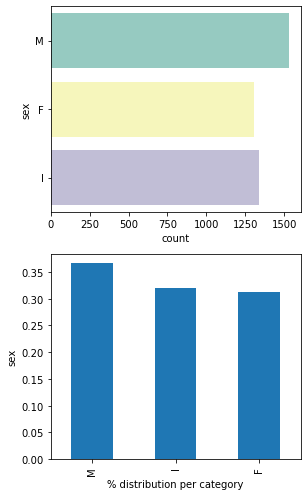

In [18]:
# analyzing categorical columns
plt.figure(figsize=(8,7))
for i,col in enumerate(categorical_attributes,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col, palette="Set3")
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

In [19]:
df.groupby('sex')[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age']].mean().sort_values('age')

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
sex,,,,,,,,
I,0.427828,0.326556,0.108157,0.431587,0.191123,0.092062,0.128026,9.391791
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


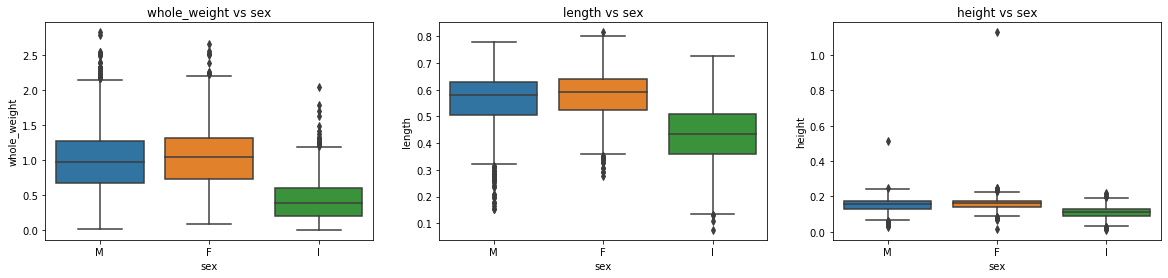

In [20]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')
plt.show()

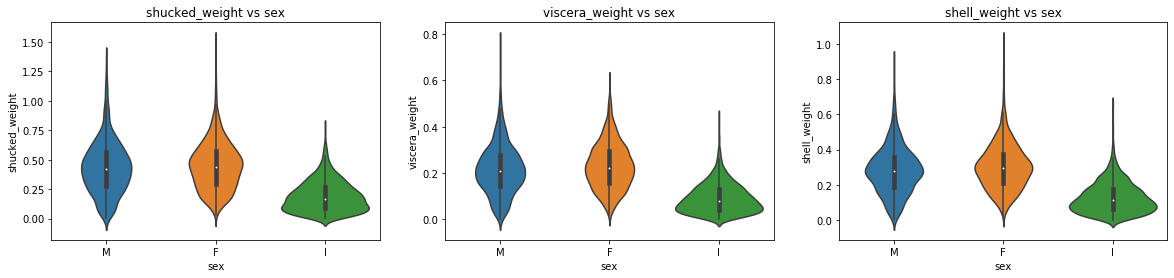

In [21]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.violinplot(x = 'sex', y = 'shucked_weight', data = df, ax = axes[0])
axes[0].set_title('shucked_weight vs sex')

sns.violinplot(x = 'sex', y = 'viscera_weight', data = df, ax = axes[1])
axes[1].set_title('viscera_weight vs sex')

sns.violinplot(x = 'sex', y = 'shell_weight', data = df, ax = axes[2])
axes[2].set_title('shell_weight vs sex')
plt.show()

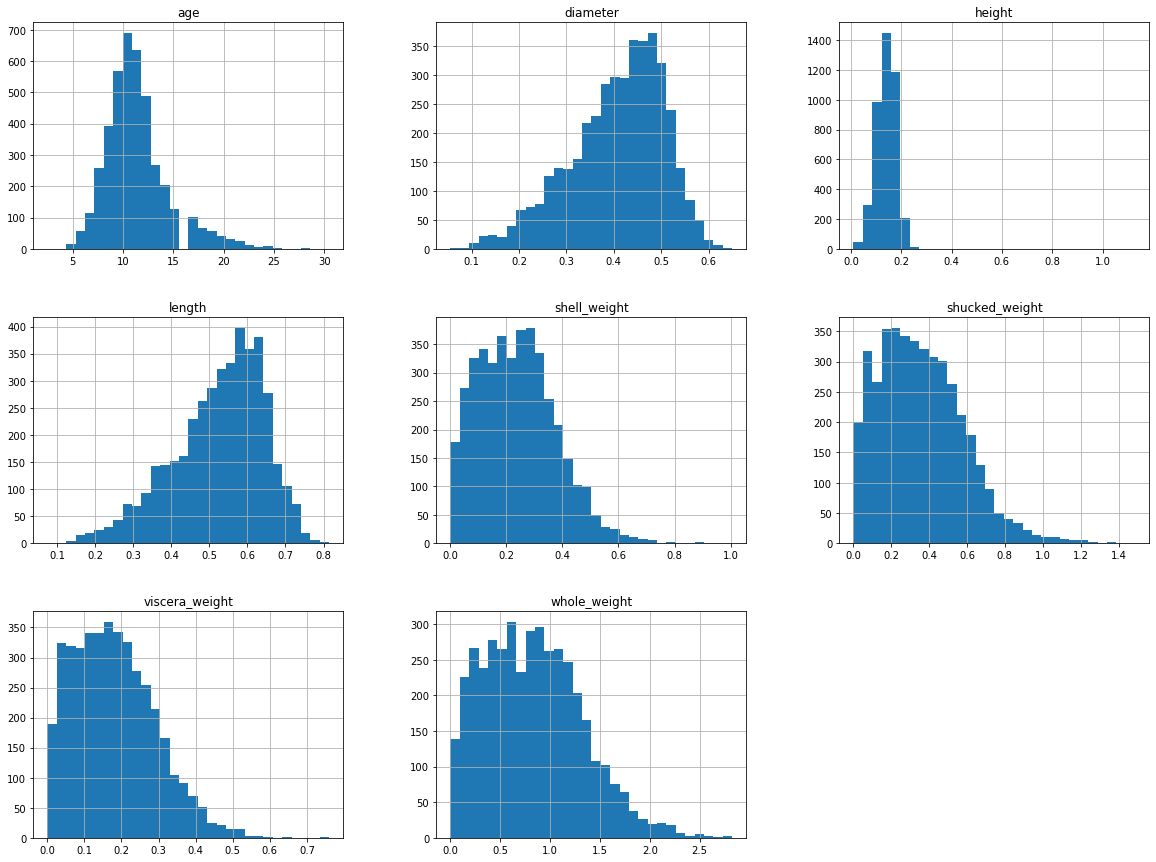

In [22]:
# Distribution for feautures
df.hist(bins=30, figsize=(20,15)) # plotting the histogram
plt.show()

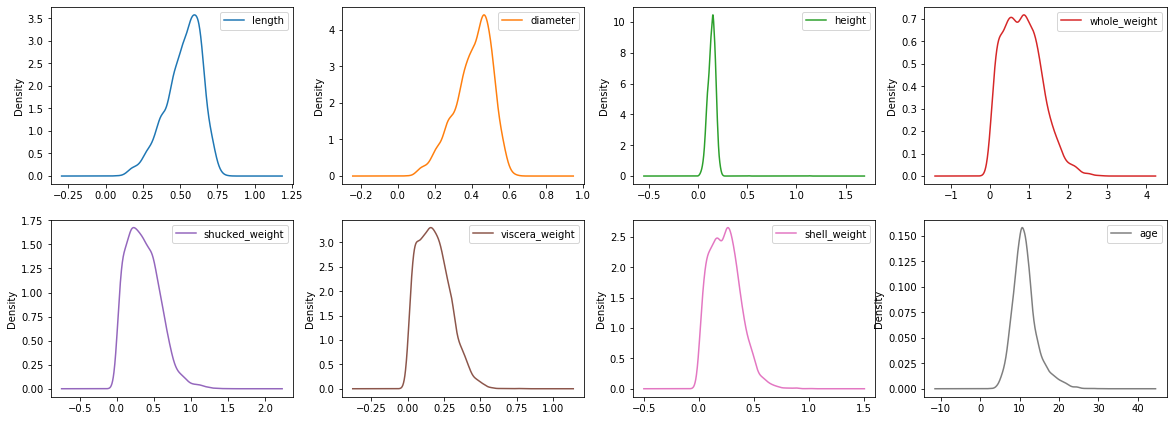

In [23]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(20,15))
plt.show()


**Observation**

From the histograms of above we can see some features are right skewed (mean>median) other are left skewed (mean<median)

- Skewness of the height is too high. (need to normalise later...)
- Need to check skewness for all varibles


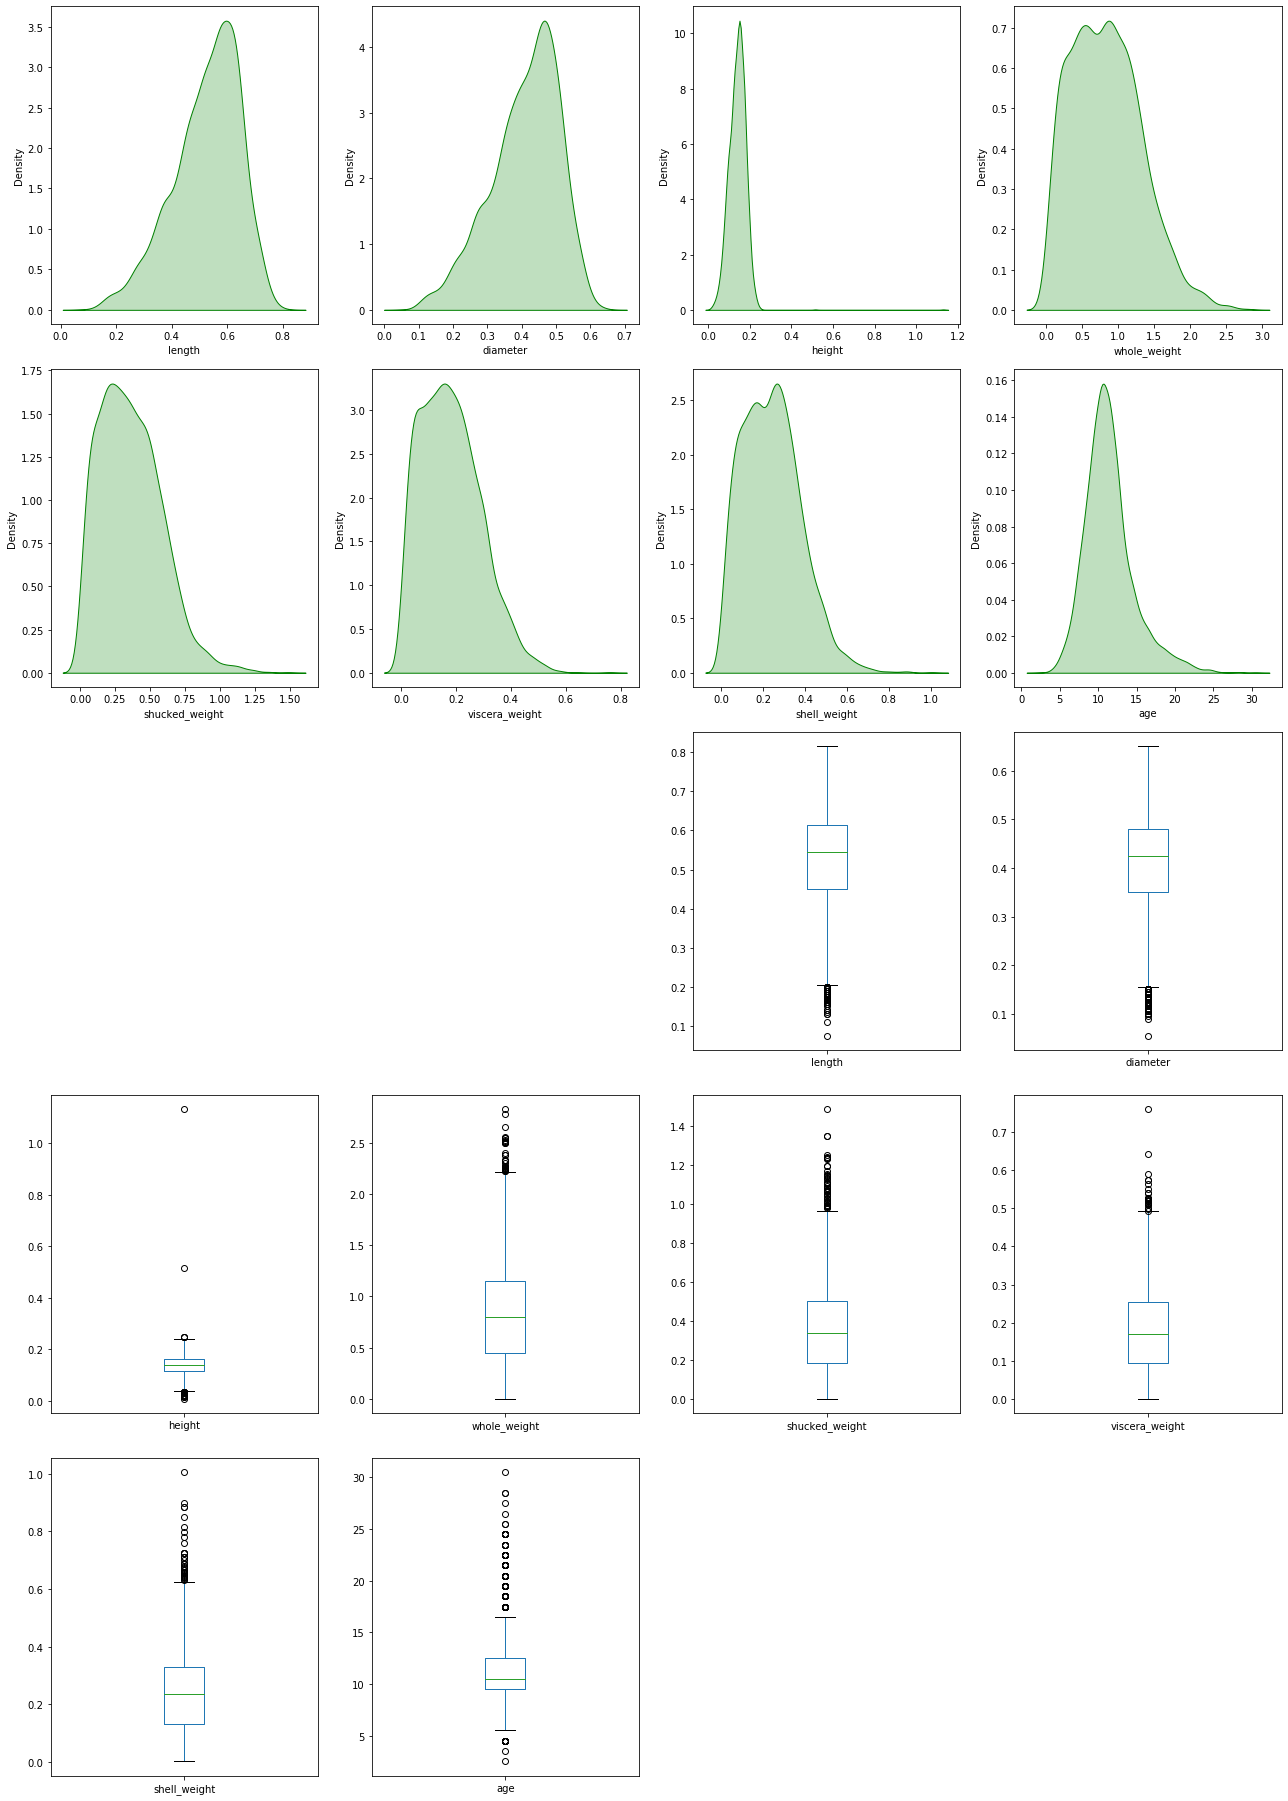

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
skewness,-0.640993,-0.610182,3.166364,0.530549,0.718735,0.591455,0.621081,1.113754
kurtosis,0.067764,-0.042756,76.756395,-0.023462,0.595121,0.084184,0.532362,2.330352


In [24]:
plt.figure(figsize=(18,40))
for i,col in enumerate(numerical_attributes,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[numerical_attributes]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [25]:
df.skew().sort_values(ascending = False)

height            3.166364
age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
diameter         -0.610182
length           -0.640993
dtype: float64

**Observation:**
- Skewness is close to 0 for Normal distribution curve.
- Height has the highest skewness of __3.17.__
   - May be there are outliers in height, we need to check that and remove them before modeling.
   - Will check the coorelation with the dependent variable `(Age)`
   - Will use IQR algorithm to remove outliers.

## Bivariate Analysis

Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.

It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

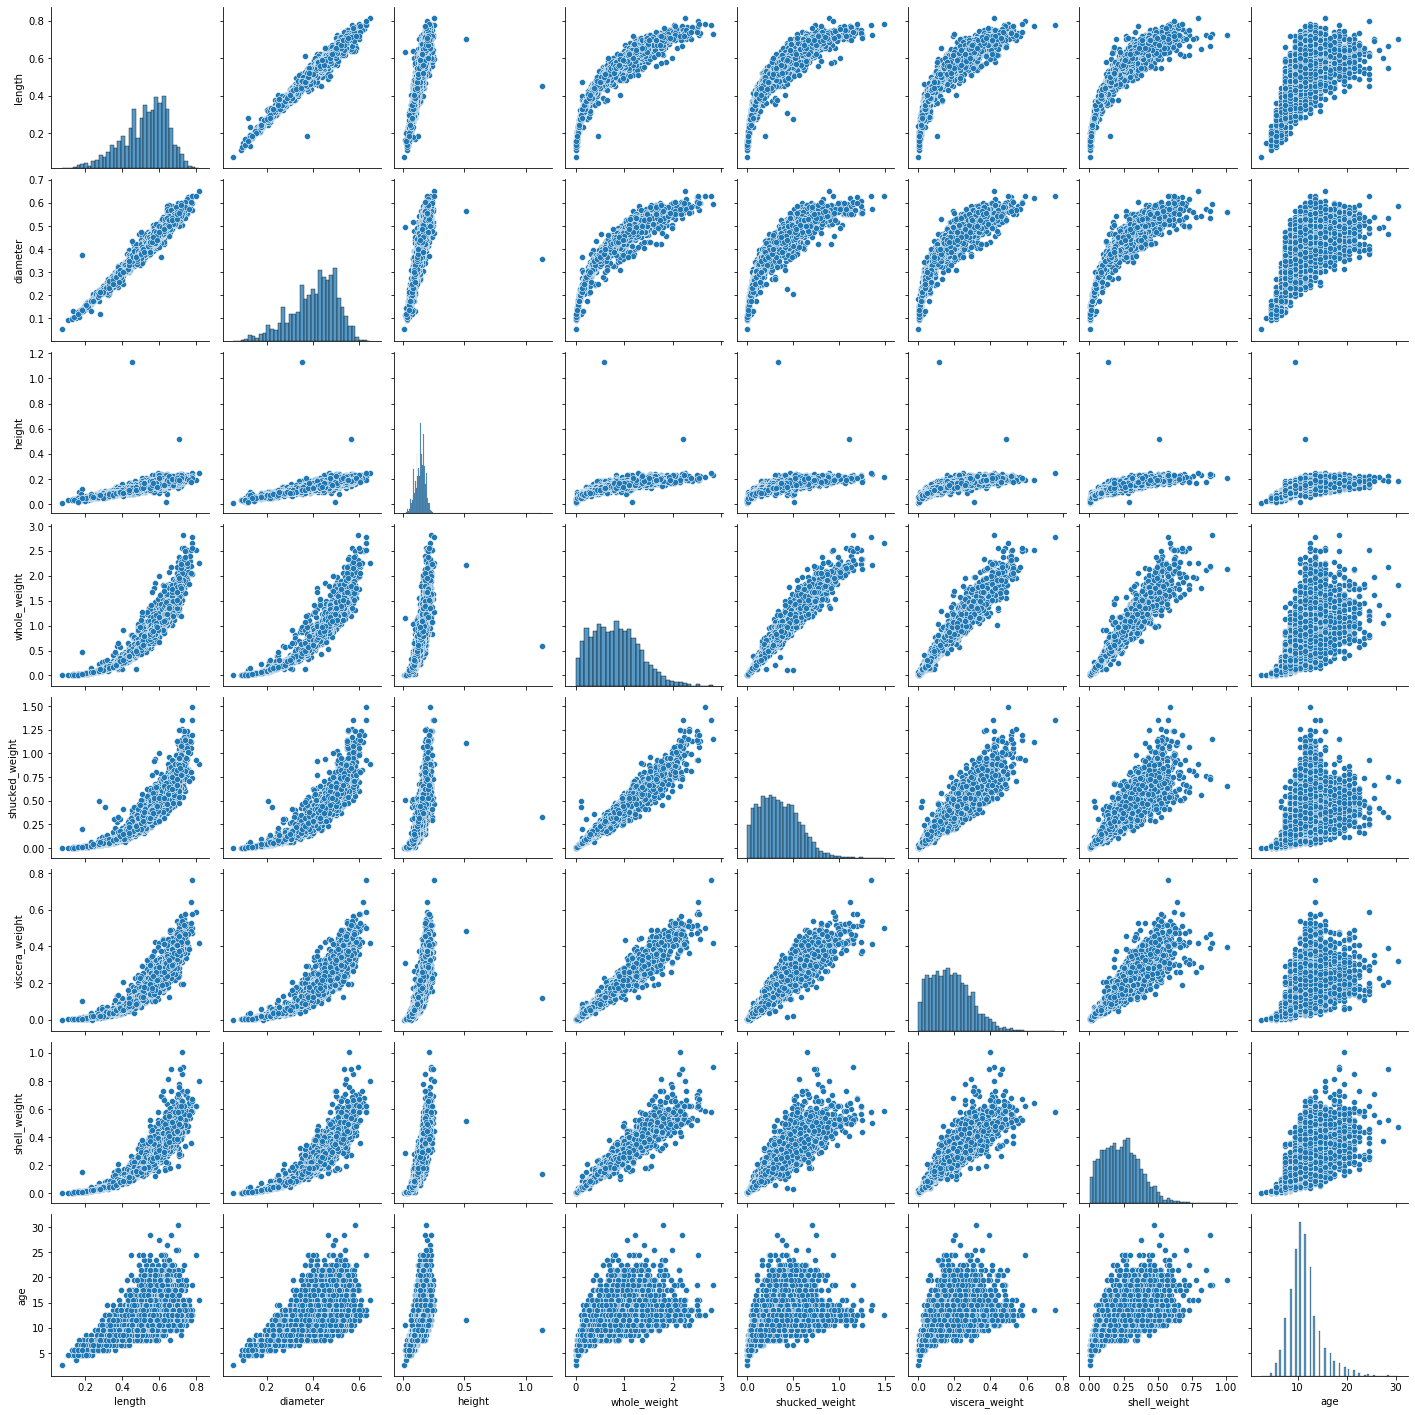

In [26]:
sns.pairplot(df[numerical_attributes])
plt.show()

**Observation**

key insights length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

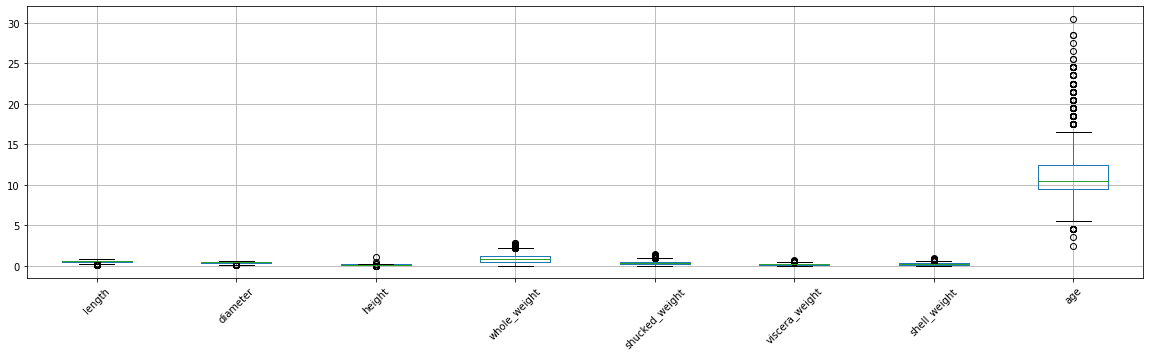

In [27]:
df.boxplot( rot = 45, figsize=(20,5))
plt.show()

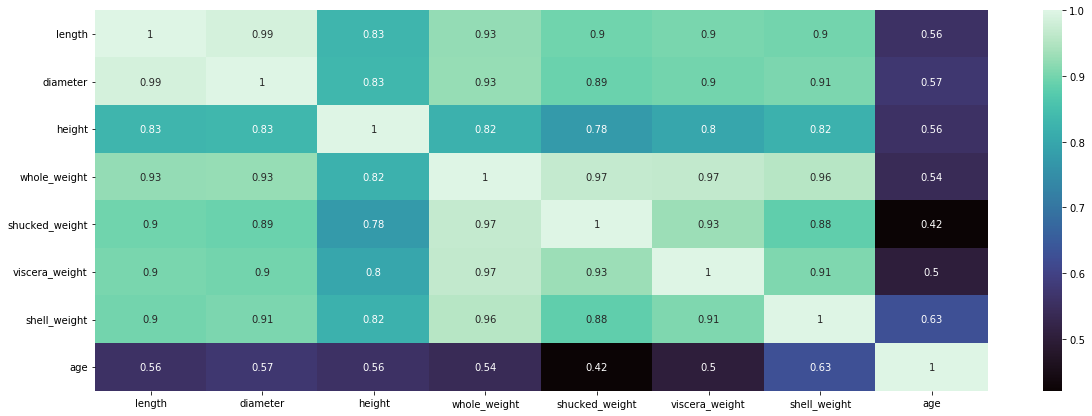

In [28]:
plt.figure(figsize=(20,7))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap = 'mako')
plt.show()

**Observation**

- No Negative correlation found
- High coorelation between **`Length & Diameter`**
- High corelation between **`shucked weight, viscera weight Vs Whole_weight** & **Shell weight vs Whole_weight`**

In [29]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['diameter', 'shucked_weight', 'viscera_weight', 'shell_weight']


In [30]:
# Drop columns
df1 = df.drop(columns_to_drop, axis=1)

In [31]:
df1.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


# Variance Inflation Factor

In [32]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating VIF
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [33]:
temp = df1.drop('sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,7.425114
1,length,7.833655
2,height,3.532659
0,const,62.359271
4,age,1.515261


**Observation**

Whole weight and length have slighter higher VIF. We will consider this as of now.

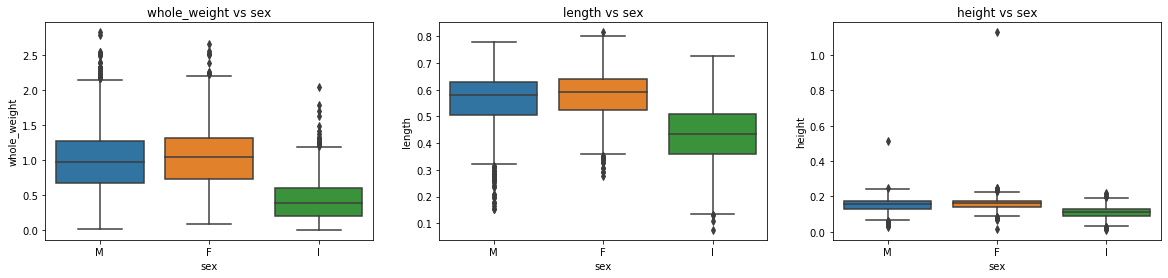

In [34]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'sex', y = 'whole_weight', data = df1, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'sex', y = 'length', data = df1, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'sex', y = 'height', data = df1, ax = axes[2])
axes[2].set_title('height vs sex')
plt.show()

**Normalise Height**
- By doing Square root transofrmation

In [35]:
df1['height'] = np.sqrt(df1['height'])

**Checking skewness again**

In [36]:
#checking skewness again
df1.skew().sort_values(ascending = False)

age             1.113754
whole_weight    0.530549
height         -0.176012
length         -0.640993
dtype: float64

__Observation__

All independent varibles values are close to zero. So, they are now close to gaussian distribution. :)

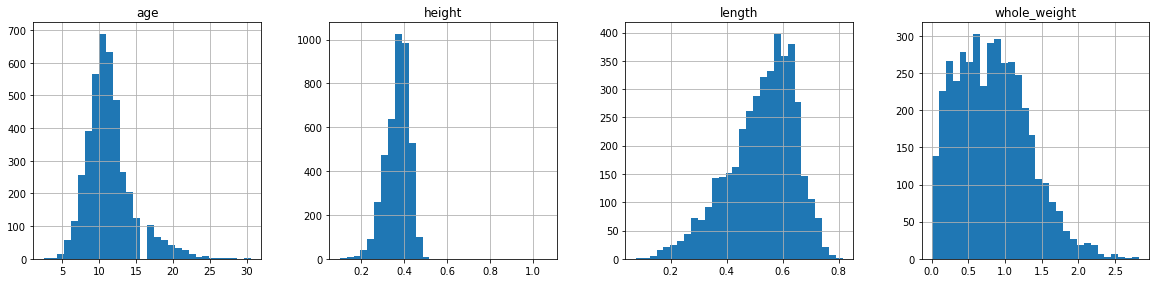

In [37]:
df1.hist(figsize = (20,10), layout = (2,4), bins = 30)
plt.show()

**Observation**

* As we can see, previously Height was highly skewed. But now, its normally distributed
* All skewed data values are close to 0.

In [38]:
df2 = df1.copy()

# Model Creation

In [39]:
Age = []
for i in df["whole_weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df2["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df2.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.308221,0.5140,1
1,M,0.350,0.300000,0.2255,1
2,F,0.530,0.367423,0.6770,2
3,M,0.440,0.353553,0.5160,1
4,I,0.330,0.282843,0.2050,1


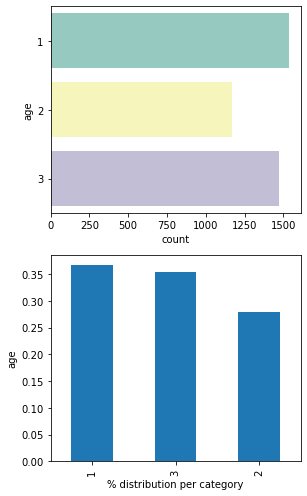

In [40]:
# analyzing categorical columns
plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
sns.countplot(data=df2,y="age", palette="Set3")
plt.subplot(2,2,i+2)
df2["age"].value_counts(normalize=True).plot.bar()
plt.ylabel(col)
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

In [41]:
new_df = pd.get_dummies(df2, columns = ['sex'], prefix_sep='_', drop_first = True)
new_df['age'].value_counts()

1    1534
3    1473
2    1168
Name: age, dtype: int64

**VIF For All Independent Features CombinedVIF For All Independent Features Combine**

In [42]:
#NEW VIF
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,9.799019
6,sex_M,1.384868
5,sex_I,1.983488
1,length,9.680103
2,height,4.979747
0,const,128.016288
4,age,5.326806


**Observartion**

Taking Sqrt Transoformation for Length column.


In [43]:
new_df['length'] = np.sqrt(new_df['length'])
vif_arr(new_df).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,whole_weight,8.556129
6,sex_M,1.384512
5,sex_I,1.984036
1,length,7.495609
2,height,5.302027
0,const,249.609951
4,age,5.264169


**Independent & Dependent Features**

In [44]:
%%time
X = new_df.drop('age', axis = 1)
y = new_df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}
df_score = pd.DataFrame(columns=['classifier',"Train Accuracy","Test Accuracy"])
acc_trs = []
acc_tss = []
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    testing_score = cross_val_score(classifier, X_test, y_test, cv=5)
    acc_trs.append(training_score.mean())
    acc_tss.append(testing_score.mean())
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    #print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(testing_score.mean(), 2) * 100, "% accuracy score")

    
df_score['classifier'] = classifiers.keys()
df_score['Train Accuracy'] = acc_trs
df_score['Test Accuracy'] =  acc_tss

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Wall time: 864 ms


In [45]:
df_score

,classifier,Train Accuracy,Test Accuracy
0,LogisiticRegression,0.978443,0.953293
1,KNearest,0.967665,0.943713
2,Support Vector Classifier,0.972156,0.958084
3,DecisionTreeClassifier,0.999102,1.000000


**Let's refine LogisticRegression**

In [46]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_log = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log.fit(X_train, y_train)
log_reg = grid_log.best_estimator_
print('Best Estimators: ', log_reg)

Best Estimators:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [47]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5) #We will use best parameters for modeling
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.73%


In [48]:
model = LogisticRegression(C=1000, solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       305
           2       0.99      0.98      0.99       238
           3       1.00      1.00      1.00       292

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835

[[303   2   0]
 [  3 234   1]
 [  0   0 292]]


## The End of expirement 1 ( using 3 class for Age)

---
---

# Start of expirement 2 ( getting the specific Age of the Abalon)

## Features : 
    - Sex
    - Length
    - Height
    - Whole_weight
    
## Target :
    - Age.

In [192]:
df3 = df1.copy()
df3.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.308221,0.5140,16.5
1,M,0.350,0.300000,0.2255,8.5
2,F,0.530,0.367423,0.6770,10.5
3,M,0.440,0.353553,0.5160,11.5
4,I,0.330,0.282843,0.2050,8.5


In [197]:
# Create a matrix of features (x; independant variables) and a dependant variable vector (y)
X = df3.iloc[:, :-1]
y = df3.iloc[:, -1]

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4175 non-null   object 
 1   length        4175 non-null   float64
 2   height        4175 non-null   float64
 3   whole_weight  4175 non-null   float64
dtypes: float64(3), object(1)
memory usage: 163.1+ KB


In [203]:
categorical= ["sex"]
numerical = ['length', 'height', 'whole_weight']
dicts = X[categorical + numerical].to_dict(orient='records')


In [204]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)
X

array([[0.31, 0.46, 0.  , 0.  , 1.  , 0.51],
       [0.3 , 0.35, 0.  , 0.  , 1.  , 0.23],
       [0.37, 0.53, 1.  , 0.  , 0.  , 0.68],
       ...,
       [0.45, 0.6 , 0.  , 0.  , 1.  , 1.18],
       [0.39, 0.62, 1.  , 0.  , 0.  , 1.09],
       [0.44, 0.71, 0.  , 0.  , 1.  , 1.95]])

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [207]:
# Random Forest

In [208]:
regressor = RandomForestRegressor(n_estimators = 400)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [213]:
y_pred = regressor.predict(X_test)


In [214]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9067312851866373

In [216]:
mean_squared_error(y_test, y_pred, squared=False)

0.9620062396767372

In [217]:
import matplotlib.patches as mpatches
def ActualvPredictionsGraph(y_test,y_pred,title):
    """
    Function to Plot the Actual Vs Prediction 
    
    Input : 
        - y_test : list of test target
        - y_pred : list of predicted target
        - title  : Plot title
    Output :
        plots
    """
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize=(12,3))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.xlabel('Index ')
    plt.ylabel('Pawpularity ')
    plt.title(title,fontdict = {'fontsize' : 15})
    plt.legend(handles = [mpatches.Patch(color='red', label='prediction'),mpatches.Patch(color='blue', label='actual')])
    plt.show()
    return

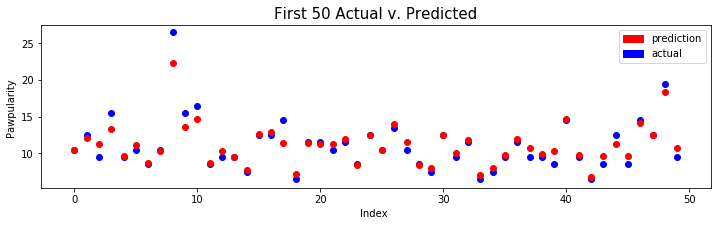

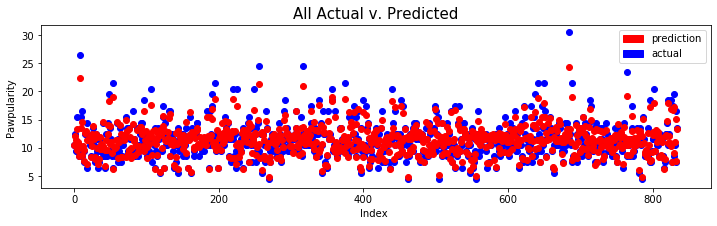

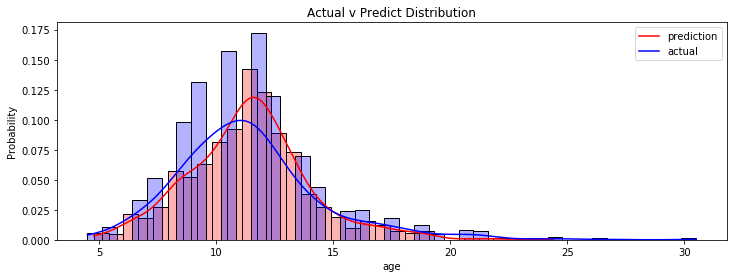

In [218]:
#plot it this is on Validation data
ActualvPredictionsGraph(y_test[0:50], y_pred[0:50], "First 50 Actual v. Predicted")
ActualvPredictionsGraph(y_test, y_pred, "All Actual v. Predicted")

#plot actual v predicted in histogram form
plt.figure(figsize=(12,4))
sns.histplot(y_pred,color='r',alpha=0.3,stat='probability', kde=True)
sns.histplot(y_test,color='b',alpha=0.3,stat='probability', kde=True)
plt.legend(labels=['prediction','actual'])
plt.title('Actual v Predict Distribution')
plt.show()

In [152]:
rmses = []
r2s = []
accs = []
for i in range(10, 601, 20):
    rf = RandomForestRegressor(n_estimators=i, random_state=1)
    rf.fit(X, y)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    acc = rf.score(X_test,y_test)
    print('n_estimators = %s -> rmse=  %.3f -> R^2 %.3f -> Acc %.3f' % (i, rmse,r2,acc))
    rmses.append(rmse)
    r2s.append(r2)
    accs.append(acc)

n_estimators = 10 -> rmse=  1.144 -> R^2 0.868 -> Acc 0.868
n_estimators = 30 -> rmse=  1.039 -> R^2 0.891 -> Acc 0.891
n_estimators = 50 -> rmse=  0.997 -> R^2 0.900 -> Acc 0.900
n_estimators = 70 -> rmse=  0.983 -> R^2 0.903 -> Acc 0.903
n_estimators = 90 -> rmse=  0.978 -> R^2 0.904 -> Acc 0.904
n_estimators = 110 -> rmse=  0.967 -> R^2 0.906 -> Acc 0.906
n_estimators = 130 -> rmse=  0.968 -> R^2 0.906 -> Acc 0.906
n_estimators = 150 -> rmse=  0.970 -> R^2 0.905 -> Acc 0.905
n_estimators = 170 -> rmse=  0.972 -> R^2 0.905 -> Acc 0.905
n_estimators = 190 -> rmse=  0.971 -> R^2 0.905 -> Acc 0.905
n_estimators = 210 -> rmse=  0.972 -> R^2 0.905 -> Acc 0.905
n_estimators = 230 -> rmse=  0.972 -> R^2 0.905 -> Acc 0.905
n_estimators = 250 -> rmse=  0.971 -> R^2 0.905 -> Acc 0.905
n_estimators = 270 -> rmse=  0.970 -> R^2 0.905 -> Acc 0.905
n_estimators = 290 -> rmse=  0.969 -> R^2 0.905 -> Acc 0.905
n_estimators = 310 -> rmse=  0.967 -> R^2 0.906 -> Acc 0.906
n_estimators = 330 -> rmse=  

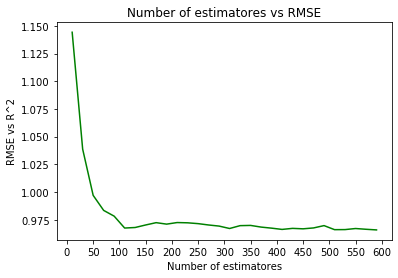

In [155]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 601, 20), rmses, color='green')
#plt.plot(range(10, 201, 10), r2s, color='red')
plt.xticks(range(0, 601, 50))

plt.title('Number of estimatores vs RMSE')
plt.xlabel('Number of estimatores')
plt.ylabel('RMSE vs R^2')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

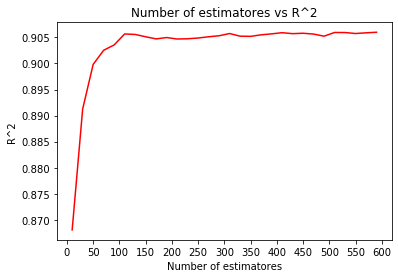

In [156]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 601, 20), r2s, color='red')
plt.xticks(range(0, 601, 50))

plt.title('Number of estimatores vs R^2')
plt.xlabel('Number of estimatores')
plt.ylabel('R^2')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [108]:
shell = {"sex":"M","length":0.55,"height":0.33,"whole_weight":0.20}

In [153]:
shell = {"sex":"M","length":0.55,"height":0.33,"whole_weight":0.20}
# I = 0, M=1 , F=2
#s = [1,0.55,0.33,0.20]


In [221]:
shell = {"sex":"M","length":0.55,"height":0.33,"whole_weight":0.20}
Xs = dv.transform([shell])

y_pred = regressor.predict(Xs)[0]

In [222]:
y_pred

12.525

# dumping the model

In [158]:
import pickle


In [223]:
n_estimators = 400
output_file = f'model_n_estimators={n_estimators}.bin'
output_file

'model_n_estimators=400.bin'

In [224]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, regressor), f_out)
f_out.close()

In [225]:
# or this method
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, regressor), f_out)

# Loading the model

In [226]:
input_file = 'model_n_estimators=400.bin'
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [227]:
# I = 0, M=1 , F=2
#ss = [2,0.2,0.23,0.50]
ss = {"sex":"I","length":0.2,"height":0.2,"whole_weight":0.40}
Xs = dv.transform([ss])

y_pred = regressor.predict(Xs)[0]
y_pred

7.2125

# Prediction using Flask 

In [185]:
import requests

In [228]:
url = 'http://localhost:9696/predict'

In [233]:
ss = {
    'sex' :'I',
    'length' : 0.2,
    'height' :0.2,
    'whole_weight': 0.40
}

response = requests.post(url, json=ss).json()
response

{'Abalone Age is': 7.2125, 'Abalone Rings': 5.7125}